# COMP 471 Assignment 3 

## Question 1 
Code based on Bayesian_optimisation

In [1015]:
import GPy  # see http://sheffieldml.github.io/GPy/ for install instructions
import numpy as np
import numpy.random as rng # random number generator
import matplotlib.pyplot as plt
from scipy.stats import norm as gaussian # useful for the Gaussian cdf.

In [1016]:
noise = 0.1
# Noisy training data
# rng.seed(0)
def actual_surface(Xtrain,noise):
    evaluations = np.sin(Xtrain) + noise * np.random.randn(*Xtrain.shape) #here is 2d (y=sin(x)+noise)
#     evaluations = Xtrain + noise * np.random.randn(*Xtrain.shape) #here it returns Xtrain with noise 
    return(evaluations)

# all the points we want to plot predictions at
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Some initial measurements at a few points
X_train = 10*rng.random(5).reshape(-1,1) - 5
Y_train = actual_surface(X_train,noise)

# Make a nice plot
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
# def plot_gp(mu, cov, X, X_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')   
    plt.legend()
    return(plt.gca())

RBF (exponential Squared)

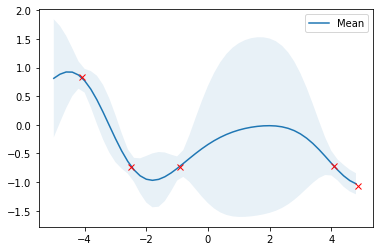

In [1017]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF,ExpSineSquared,RationalQuadratic, DotProduct

rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)


gpr = GaussianProcessRegressor(kernel=rbf, alpha=noise**2)

# Reuse training data from previous 1D example
gpr.fit(X_train, Y_train)
# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X, return_cov=True)

# Obtain optimized kernel parameters

# Plot the results
thePlot = plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)
# thePlot = plot_gp(mu_s, cov_s, X, X_train=X_train)




Perodic kernel (ExpSinSquared)

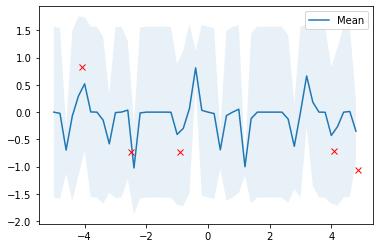

In [1023]:
rbf =  ConstantKernel(1.0) *ExpSineSquared(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=noise**2)
# Reuse training data from previous 1D example
gpr.fit(X_train, Y_train)

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X, return_cov=True)

# Obtain optimized kernel parameters

# Plot the results
thePlot = plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)


RelationalQuadratic

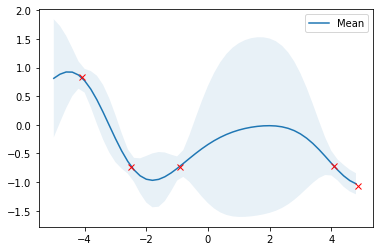

In [1024]:
rbf =  ConstantKernel(1.0) *RationalQuadratic(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=noise**2)
# Reuse training data from previous 1D example
gpr.fit(X_train, Y_train)
# gpr.fit(X_train)

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X, return_cov=True)

# Obtain optimized kernel parameters

# Plot the results
thePlot = plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)
# thePlot = plot_gp(mu_s, cov_s, X, X_train=X_train)

Combining RelationalQuatratic with ExpSineSquared

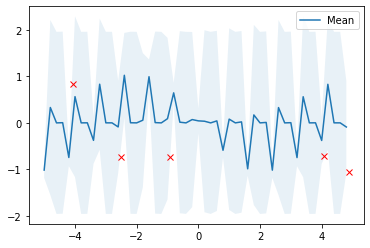

In [1115]:

rbf =  RationalQuadratic(length_scale=1.0)*ExpSineSquared(length_scale=1.0)

gpr = GaussianProcessRegressor(kernel=rbf, alpha=noise**2)

# Reuse training data from previous 1D example
gpr.fit(X_train, Y_train)
# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X, return_cov=True)

# Obtain optimized kernel parameters

# Plot the results
thePlot = plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)


<font size="3">
Kernel in gaussian process is used to describes the covariance. Kernels with mean function is the whole Gaussian Process.
    
In the first figure it is using RBF kernerl which is the most popular one, the mean function(blue line) is close to a sine wave which is the true function. 

The second figure is produced by using Perodic kernel (ExpSinSquared). The showing figure looks far away from a sine wave function, but we can see it is still symmetrical，and periodic. And the mean values at the data point is close to the value(y) of data point.

The third one is using RelationalQuadratic kernel, I think the result is quite close to RBF, due to these two kernel function are actually quite similar.(I think)

The last one, I combined Relational Quadratic with ExpSinSquared. The result mean is not close to the data. Maybe I should change the parameter of these two kernels. Tbh, I am not sure what gonna happen for combining these two together, but the result tells it maybe a bad idea.
</font>

## Question 2

<font size="4">I think the behavior is completely different between Bayesian Optimization and optimization algorithms like PSO.
    
Talking about Bayesian optimization and other optimization algorithms like PSO, I think the main advantage of Bayesian optimization is that it saves lots computation(money) cost. With Gaussian Process, it estimates the function(mean) first, and then find the point where it has the most potential to find best solution/points. The potential points are not always around the best point, where PSO always start with the current best point and look around. Random searches like PSO do not have a "basic guess", where Bayesian Optimization gives guesses on where can be the next best point.

Comparing the results, it really depends on what kind of datasets/problems they applied to. PSO is easy to stuck with local optimal points. This is also a common problem for most swarm based random search. But for Bayesian Optimization, it is not usually occurs. Becuase it is not looking around the current best points.
If Population based optimization algorithms like PSO have the search space big enough, it could find the global optimal. And the result of PSO and bayesian optimization can be the same.</font>



 ## Question 3

 # (1)

In [836]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import seaborn as sns

The "rectangle" draw by green lines is p(x) 

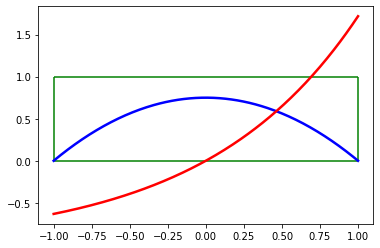

In [853]:
X = np.linspace(-1, 1, 256,endpoint=True)
C = 3/4 * (1- X**2)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
Y = np.exp(X)-1
plt.plot(X, Y, color="red", linewidth=2.5, linestyle="-")

plt.vlines(x=-1,ymin=0, ymax=1, color = "green")
plt.vlines(x=1,ymin=0, ymax=1,color ="green")
plt.hlines(y=1, xmin=-1, xmax=1,color = "green")
plt.hlines(y=0, xmin=-1, xmax=1,color = "green")

In [907]:
def p(x):#p(x)
    if x > 1 or x <1 :
        p = 3/4 * (1- x**2)
    else:
        p = 0
    return p 

In [908]:
def f(x):
    pdf = np.exp(x)-1 #f(x)
    return pdf

number of accepted :  471
total number of samples :  1000
area under curve should be around :  0.10594312936600792
**************************************************
The following graph is just check rejection sampling


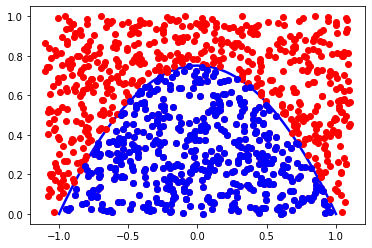

In [776]:
total = 1000
total_sum = 0 # the toal sum of f(x)*p(x) 
counter= 0 # count the number of points been accepted 
x_acctotal =[]
y_acctotal =[]
x_total =[]
y_total =[]
for i in range(0, total):
      x =  np.random.uniform(-1.1, 1.1)
      y =  np.random.uniform(0, 1)
      x_total.append(x)
      y_total.append(y)
      if y <=p(x) and np.abs(x)<=1: #accept 
            counter+=1
            total_sum += f(x)  # use accepted y times the f(x) and sum them up
            x_acctotal.append(x)
            y_acctotal.append(y)
      else:
        #rejected
        continue


cdf = total_sum/counter
print("number of accepted : ",counter)
print("total number of samples : ",total)
print("area under curve should be around : ", cdf)
print("*"*50)
print("The following graph is just check rejection sampling")
X = np.linspace(-1, 1, 256,endpoint=True) 
C = 3/4 * (1- X**2)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(x_total,y_total, "ro")
plt.plot(x_acctotal,y_acctotal,"bo")

# 2 Importance Sampling

Here I wanna try the one mentioned in class where the q(x) = |f(x)| * p(x),
I am bit confuse about we using this kind distribution, if we do the math, $w$ becomes $\frac{1}{|f(x)|}$ and 
$f*w$ will just simply become $\frac{f}{|f|}$ 

so the whole thing become $\frac{\sum 1}{\sum(\frac{1}{|f(x)|})} = mean\_of |f(x)|$ ?


In [920]:
def q(x):
    q = p(x) * np.abs(f(x))
    return q

In [921]:
def w(x):
    w  = p(x)/q(x)
    return w

In [993]:
total = 1000
sum_fw = 0
sum_w = 0
for i in range(0, total):
    x =  np.random.uniform(-1, 1)
    sum_fw += f(x)*w(x)
    sum_w +=w(x)

area = sum_fw/sum_w
print("The total area estimated is : ", area)
    

The total area estimated is :  -0.0002904443308723599


### Visualize p(x) and f(x) x between -1 to 1

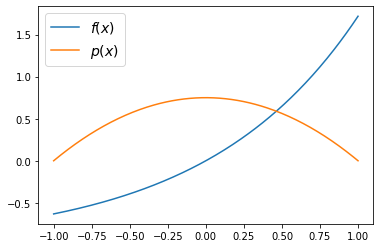

In [868]:
plt.figure()
x = np.linspace(-1, 1, 256) 
y = [f(i) for i in x]
y_p = [p(i) for i in x]

plt.plot(x, y, label="$f(x)$")
plt.plot(x, y_p, label="$p(x)$")
plt.legend(prop={"size": 14})

Here I changed q to a normal distribution and the value(around 0.11) is a bit higher than the true area.

In [1003]:
def q_1():
    # return probability given a value
    mu=0
    sigma =1
    distribution = stats.norm(mu, sigma)
    return distribution

In [1004]:
value_list = []
value_w = 0
value_fw =0
n=1000
for i in range(n):
    # sample from different distribution
    x_i = np.random.uniform(-1, 1)
    value = f(x_i)*(p(x_i) / q_1().pdf(x_i))
    value_list.append(value)
    value_w+=(p(x_i) / q_1().pdf(x_i))
    value_fw+=value

print("The area : ",value_fw/value_w)

The area :  0.11793573705804783


## Question 4

In [1090]:
 # Utilities of individual states (NOTE this is the _instant_ utility 
# irrespective of future, not the long-term value that depends on policy)
# U = np.array([[-3,-3,-3,100],[-3,0,-3,-100],[-3,-3,-3,-3]]).T
U = np.array([[-3,-3,-3,100,-3,0,-3,-100,-3,-3,-3,-3]]).T
print(U)

[[  -3]
 [  -3]
 [  -3]
 [ 100]
 [  -3]
 [   0]
 [  -3]
 [-100]
 [  -3]
 [  -3]
 [  -3]
 [  -3]]


In [1105]:
#Transition matrix
# T = np.array([0.1,0.8,0.1])

T = np.array([[0.9,0.1,  0,0,0,0,0,0,0,0,0,0], #r1c1
                  [0.1,0.8,0.1,0,0,0,0,0,0,0,0,0], #r1c2
                  [0,0.1,0.8,0.1,0,0,0,0,0,0,0,0], #r1c3
                  [0,  0,0,0,0,0,0,0,1,0,0,0], ##teleport to start #r1c4
                  [0.8,0,0,0,0.2,0,0,0,0,0,0,0],#r2c1
                  [0,0,0,0,0,0,0,0,0,0,0,0], #r2c2 never reach all zero here
                  [0,0,0.8,0,0,0,0.1,0.1,0,0,0,0], #r2c3
                  [0,0,0,0.8,0,0,0.1,0.1,0,0,0,0], #r2c4
                  [0,0,0,0,0.8,0,0,0,0.1,0.1,0,0], #r3c1
                  [0,0,0,0,0,0,0,0,0.1,0.8,0.1,0], #r3c2
                  [0,0,0,0,0,0,0.8,0,0,0.1,0,0.1], #r3c3
                  [0,0,0,0,0,0,0,0.8,0,0,0.1,0.1]]) #r3c4
# print(T)

In [1106]:
#the state can be r1c1,r1c2,r1c3,r1c4......r3c1,r3c2,r3c3,r3c4
initial_V = rng.random((1,12,1)).T
initial_V = initial_V[0]
initial_V[5] =0 #r2c2 should be zero cuz we can never reach so I also initialize here as zero
# print("intial V :", initial_V)
V=initial_V

In [1107]:
print(T)
print( V)

[[0.9 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.8 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.8 0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.8 0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.8 0.  0.  0.  0.1 0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0.  0.1 0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.8 0.  0.  0.  0.1 0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.8 0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.8 0.  0.  0.1 0.  0.1]
 [0.  0.  0.  0.  0.  0.  0.  0.8 0.  0.  0.1 0.1]]
[[0.8393453 ]
 [0.54429822]
 [0.30298475]
 [0.0553399 ]
 [0.88876603]
 [0.        ]
 [0.21563327]
 [0.96402385]
 [0.47253085]
 [0.43850263]
 [0.60661736]
 [0.22629375]]


finally, 
 [[-13.34859504]
 [ -9.22008265]
 [  9.35822313]
 [ 88.83208671]
 [-13.7417867 ]
 [  0.        ]
 [ -0.83532784]
 [-46.97205514]
 [-13.95989161]
 [-13.10445988]
 [ -7.51017787]
 [-36.59014078]]


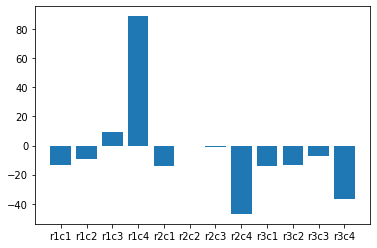

In [1114]:
gamma=0.8
for t in range(50):
    V = U +  gamma * np.dot(T,V)
print('finally, \n',V)
mybars = plt.bar(['r1c1','r1c2','r1c3','r1c4','r2c1','r2c2','r2c3','r2c4','r3c1','r3c2','r3c3','r3c4'], V[:,0])